# Results

This notebook contains the main plots and statistical test from the presentation including suplement interpretation of results.

In [1]:
%matplotlib inline
import pandas as pd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import powerlaw
from scipy.stats import combine_pvalues, norm
import statsmodels.api as sm
from statsmodels.formula.api import ols
import glob
import ast
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM
from statsmodels.tsa.stattools import adfuller
import matplotlib.patches as mpatches
import random
from typing import List, Any, Tuple, Dict
import ast
import custom_functions_final as cm
from typing import Dict, List, Any, Tuple, Union

C:\Users\nitai\AppData\Local\Temp\ipykernel_30612\71907010.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# H1A




### Our model

In [2]:
path = R'.\Data\H1A\Data our model'


In [3]:
input_parameters = '2000_1_1_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate'

# Get the matching files
selected_files = cm.get_files_with_parameters(path, input_parameters)

All files in directory: ['100_2000_1_1_1_5_1_3_200_hard cutoff_divide exposure singly_intrest_rate_20240131000358.csv', '100_2000_1_1_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240131000537.csv', '100_2000_1_1_1_5_1_3_600_hard cutoff_divide exposure singly_intrest_rate_20240131000716.csv', '100_2000_1_2_1_5_1_3_200_hard cutoff_divide exposure singly_intrest_rate_20240131000851.csv', '100_2000_1_2_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240131001028.csv', '100_2000_1_2_1_5_1_3_600_hard cutoff_divide exposure singly_intrest_rate_20240131001205.csv', '100_2000_1_4_1_5_1_3_200_hard cutoff_divide exposure singly_intrest_rate_20240131001336.csv', '100_2000_1_4_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240131001508.csv', '100_2000_1_4_1_5_1_3_600_hard cutoff_divide exposure singly_intrest_rate_20240131001640.csv', '100_200_1_1_1_2_2_2_1_hard cutoff_divide exposure singly_exposure_20240130232202.csv', '100_200_1_1_1_2_2_2_1_hard cuto

In [4]:
data_our_model_bankruptcy = cm.select_variable_given_list_of_dfs(selected_files, 'Abs Difference of Bankrupt Agents Over Time')

In [5]:
titles = ['100 Agents (Our Model)', '200 Agents (Our Model)', '300 Agents (Our Model)']

In [6]:
param_caption = { "runs": 5,
  "time_steps": 2000,
  "delta_t": 1,
  "sigma_exposure_node": 1,
  "sigma_intrestrate": 1,
  "linking_threshold": 1,
  "threshold_v": 5,
  "linking_threshold": 1,
  "time_to_maturity": 400,
  "link_threshold_mode": "hard cutoff",
  "link_formation_mode": 'divide exposure singly',
  "bankruptcy_mode": "intrest_rate",
}

In [7]:
param_caption = { "runs": 5,
  "time_steps": 2000,
  "delta_t": 1,
  "sigma_exposure_node": 1,
  "sigma_intrestrate": 1,
  "linking_threshold": 1,
  "threshold_v": 5,
  "linking_threshold": 1,
  "time_to_maturity": 400,
  "link_threshold_mode": "hard cutoff",
  "link_formation_mode": 'random link logic',
  "bankruptcy_mode": "exposure",
}

In [8]:
titles = ['100 Agents (Our Model)', '200 Agents (Our Model)', '300 Agents (Our Model)']

Results Summary for 100 Agents (Our Model), run 1:


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 05, Feb, 2024
Time:                     00:32:47
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    9.31957
Nobs:                     1999.00    HQIC:                   9.30893
Log likelihood:          -14965.0    FPE:                    10968.3
AIC:                      9.30276    Det(Omega_mle):         10935.4
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         1.138640         0.271207            4.198           0.000
L1.y1         0.023147         0.022768            1.017           0.309
L1.y2         0.000149         0.000226            0.659           0.510

Results for equation 

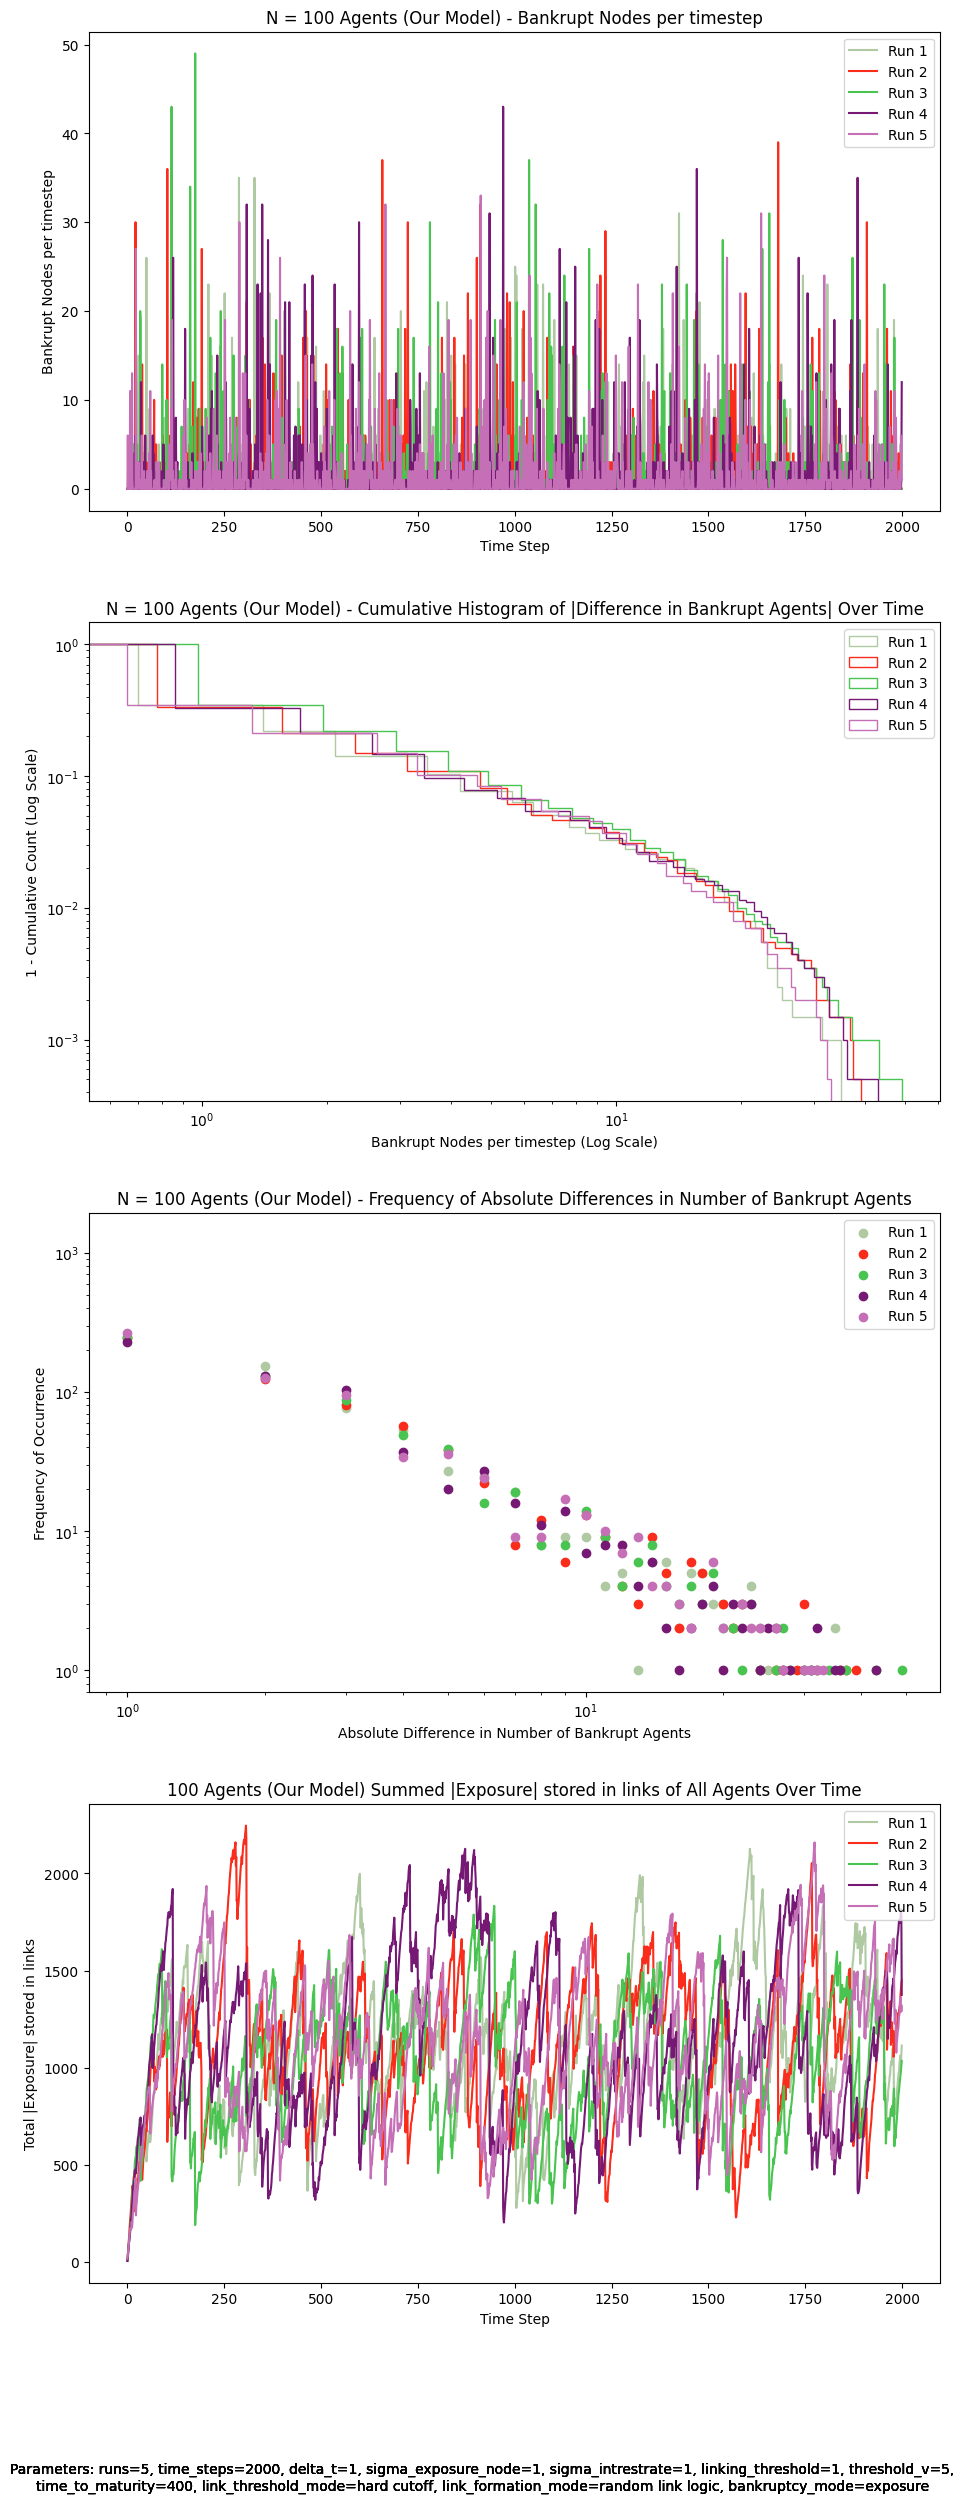

Results Summary for 200 Agents (Our Model), run 1:
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 05, Feb, 2024
Time:                     00:32:51
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    12.5424
Nobs:                     1999.00    HQIC:                   12.5317
Log likelihood:          -18186.2    FPE:                    275286.
AIC:                      12.5256    Det(Omega_mle):         274461.
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         2.547001         0.479094            5.316           0.000
L1.y1         0.062999         0.022733            2.771           0.006
L1.y2        -0.000112         0.000157     

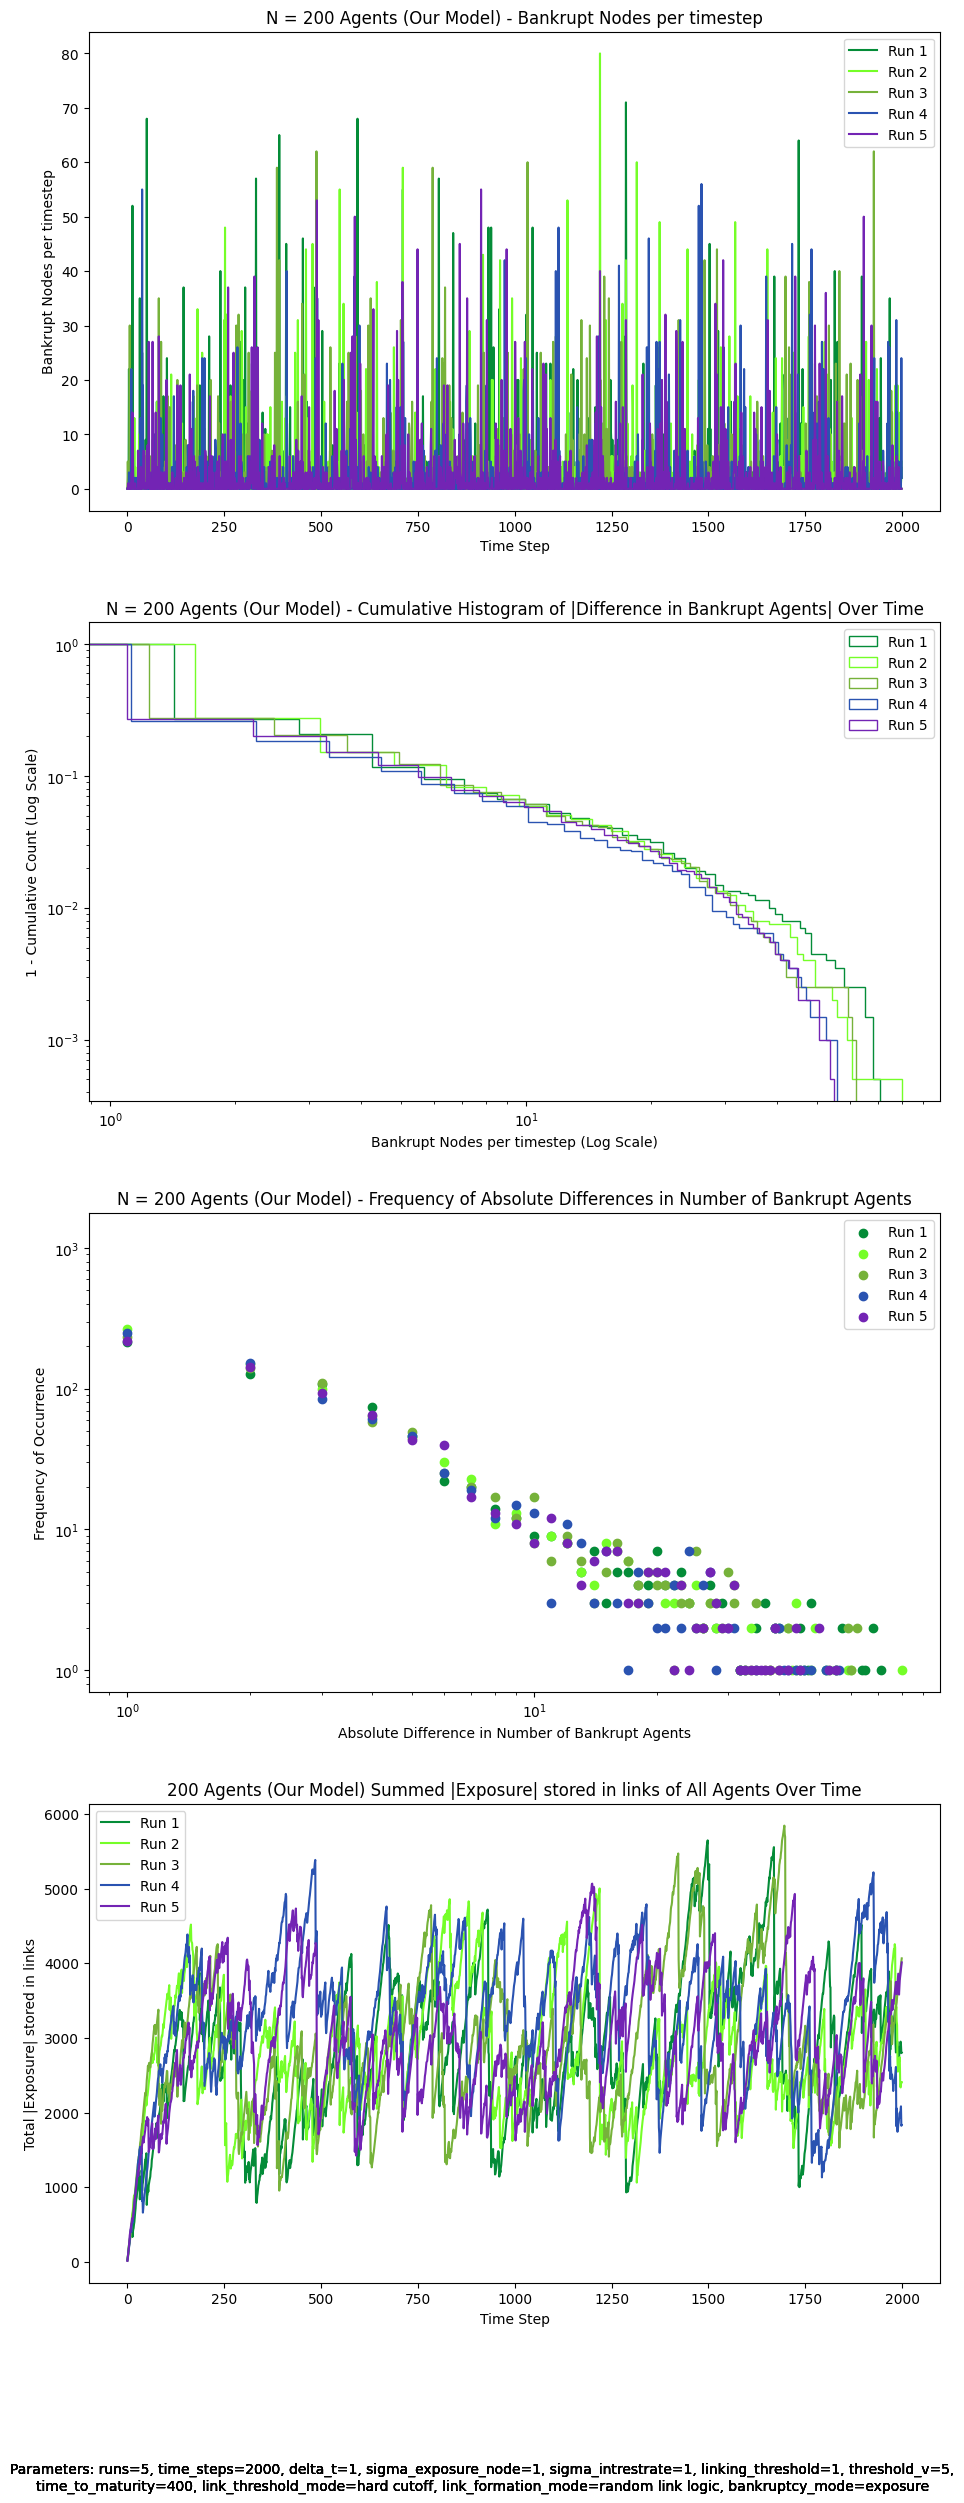

Results Summary for 300 Agents (Our Model), run 1:
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 05, Feb, 2024
Time:                     00:32:55
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    13.7731
Nobs:                     1999.00    HQIC:                   13.7624
Log likelihood:          -19416.3    FPE:                    942478.
AIC:                      13.7563    Det(Omega_mle):         939655.
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         2.605037         0.708780            3.675           0.000
L1.y1         0.077173         0.022653            3.407           0.001
L1.y2         0.000069         0.000138     

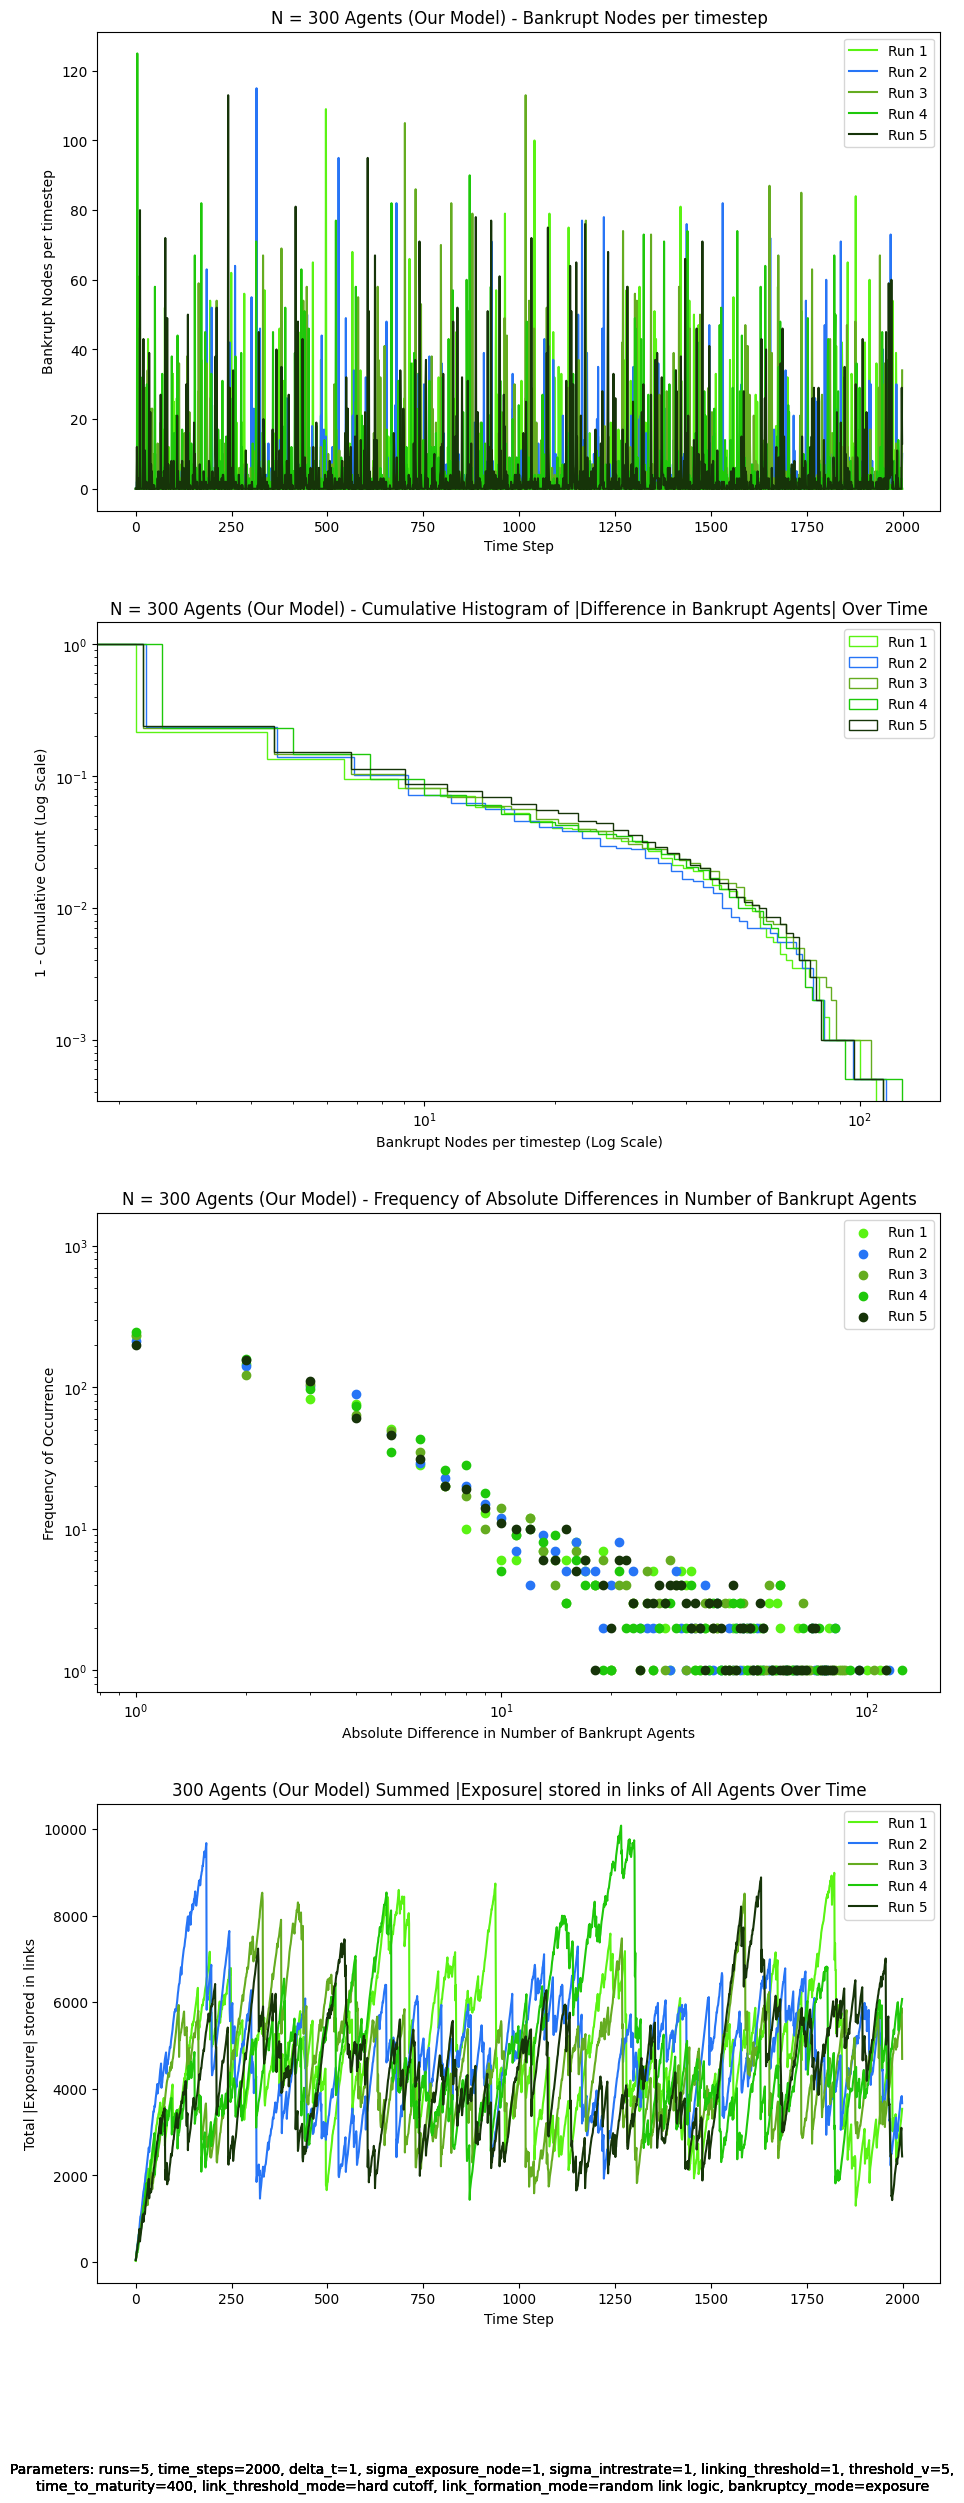

In [9]:
cm.plot_bankruptcy_analysis_multiple_arrays(selected_files,  titles, param_caption)

In [10]:
cm.fit_power_law_array(data_our_model_bankruptcy, titles)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data

,N agents (Nodes),run,alpha exponent,likelihood ratio,p-value
0,100 Agents (Our Model),1,2.582411,2.253132,0.0243*
1,100 Agents (Our Model),2,2.495865,4.384189,0.0***
2,100 Agents (Our Model),3,4.170634,-0.14068,0.8881
3,100 Agents (Our Model),4,2.824595,-0.817323,0.4137
4,100 Agents (Our Model),5,3.504318,0.322458,0.7471
5,,Stouffer’s p-value,,,0.0212*
6,200 Agents (Our Model),1,2.229182,7.322882,0.0***
7,200 Agents (Our Model),2,2.215366,5.920257,0.0***
8,200 Agents (Our Model),3,2.239663,5.87563,0.0***
9,200 Agents (Our Model),4,2.25435,5.218964,0.0***


# Drupsteens model

Here we perform hypothesis test for H1A, but now for Drupsteens model. Important to note: this is our implementation of Drupsteens model and not data from his actual study.

In [11]:
path = R'.\Data\H1A\Data Drupsteens model'


<!-- '2000_1_1_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate' -->

In [12]:
input_parameters = '2000_1_1_1_5_1_3_400_hard cutoff_random link logic_exposure'

# Get the matching files
selected_files = cm.get_files_with_parameters(path, input_parameters)

data_Drupsteen = cm.select_variable_given_list_of_dfs(selected_files, 'Abs Difference of Bankrupt Agents Over Time')

All files in directory: ['100_2000_1_1_1_5_1_2_200_hard cutoff_random link logic_exposure_20240131085653.csv', '100_2000_1_1_1_5_1_2_400_hard cutoff_random link logic_exposure_20240131092225.csv', '100_2000_1_1_1_5_1_2_600_hard cutoff_random link logic_exposure_20240131092355.csv', '100_2000_1_1_1_5_1_3_400_hard cutoff_random link logic_exposure_20240131155444.csv', '100_2000_1_1_1_5_1_4_200_hard cutoff_random link logic_exposure_20240131092557.csv', '100_2000_1_1_1_5_1_4_400_hard cutoff_random link logic_exposure_20240131092859.csv', '100_2000_1_1_1_5_1_4_600_hard cutoff_random link logic_exposure_20240131094135.csv', '100_2000_1_1_1_5_1_8_200_hard cutoff_random link logic_exposure_20240131094411.csv', '100_2000_1_1_1_5_1_8_400_hard cutoff_random link logic_exposure_20240131094707.csv', '100_2000_1_1_1_5_1_8_600_hard cutoff_random link logic_exposure_20240131094958.csv', '100_2000_1_2_1_5_1_2_200_hard cutoff_random link logic_exposure_20240131095038.csv', '100_2000_1_2_1_5_1_2_400_har

In [13]:
titles = ["100 Agents (Drupsteen's Model)", "200 Agents (Drupsteen's Model)", "300 Agents (Drupsteen's Model)"]

In [14]:
param_caption = { "runs": 5,
  "time_steps": 2000,
  "delta_t": 1,
  "sigma_exposure_node": 1,
  "sigma_intrestrate": 1,
  "linking_threshold": 1,
  "threshold_v": 5,
  "linking_threshold": 1,
  "time_to_maturity": 400,
  "link_threshold_mode": "hard cutoff",
  "link_formation_mode": 'random link logic',
  "bankruptcy_mode": "exposure",
}

Results Summary for 100 Agents (Drupsteen's Model), run 1:


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 05, Feb, 2024
Time:                     00:33:00
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    3.79145
Nobs:                     1998.00    HQIC:                   3.77371
Log likelihood:          -9419.74    FPE:                    43.0957
AIC:                      3.76342    Det(Omega_mle):         42.8808
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.271375         0.075650            3.587           0.000
L1.y1         0.088805         0.060180            1.476           0.140
L1.y2        -0.001696         0.000713           -2.378           0.017
L2.y1         0.134423

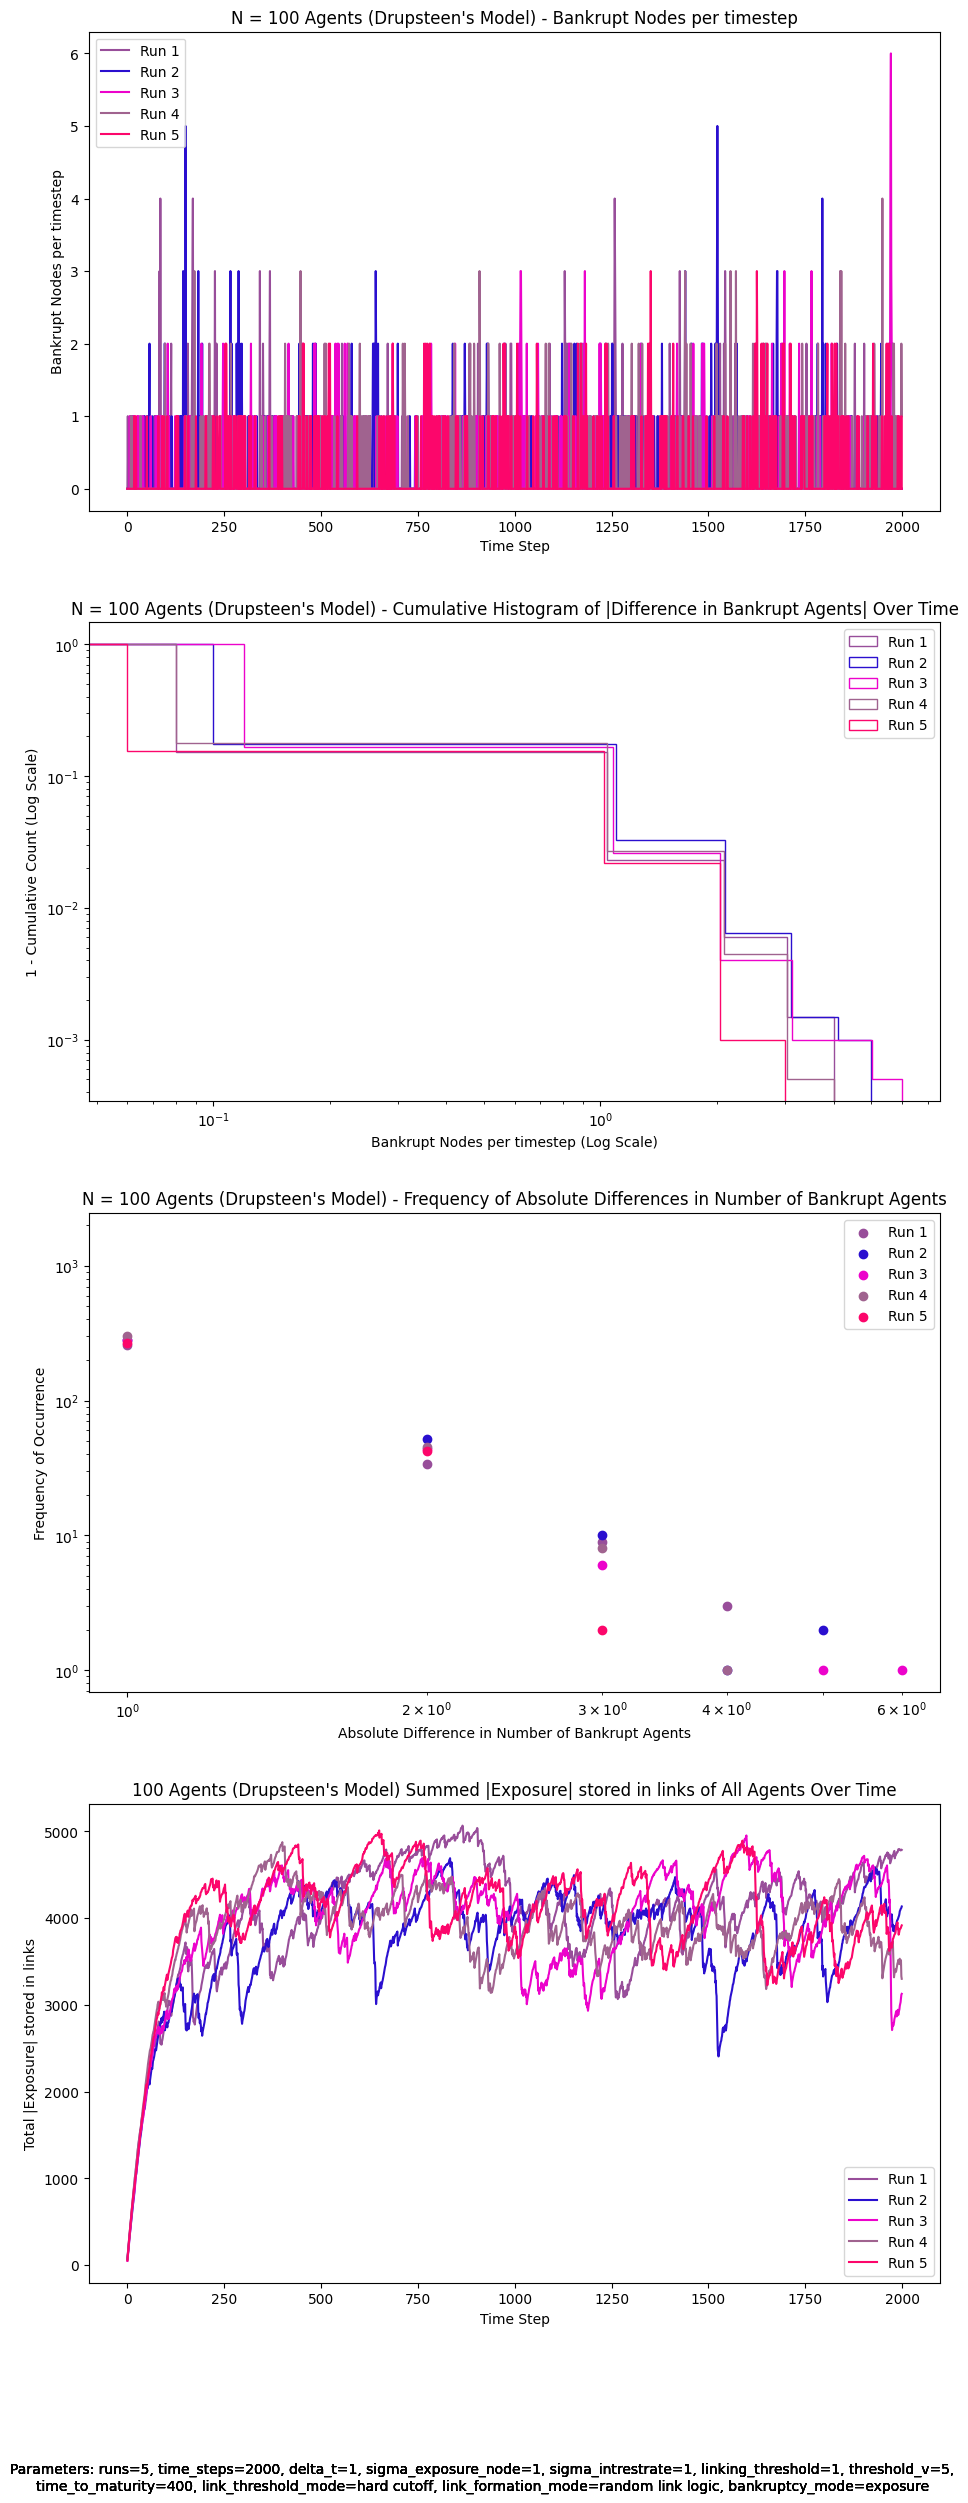

Results Summary for 200 Agents (Drupsteen's Model), run 1:
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 05, Feb, 2024
Time:                     00:33:05
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    5.53928
Nobs:                     1998.00    HQIC:                   5.52155
Log likelihood:          -11165.8    FPE:                    247.461
AIC:                      5.51125    Det(Omega_mle):         246.227
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.357310         0.097154            3.678           0.000
L1.y1         0.061468         0.071148            0.864           0.388
L1.y2        -0.001681         0.000

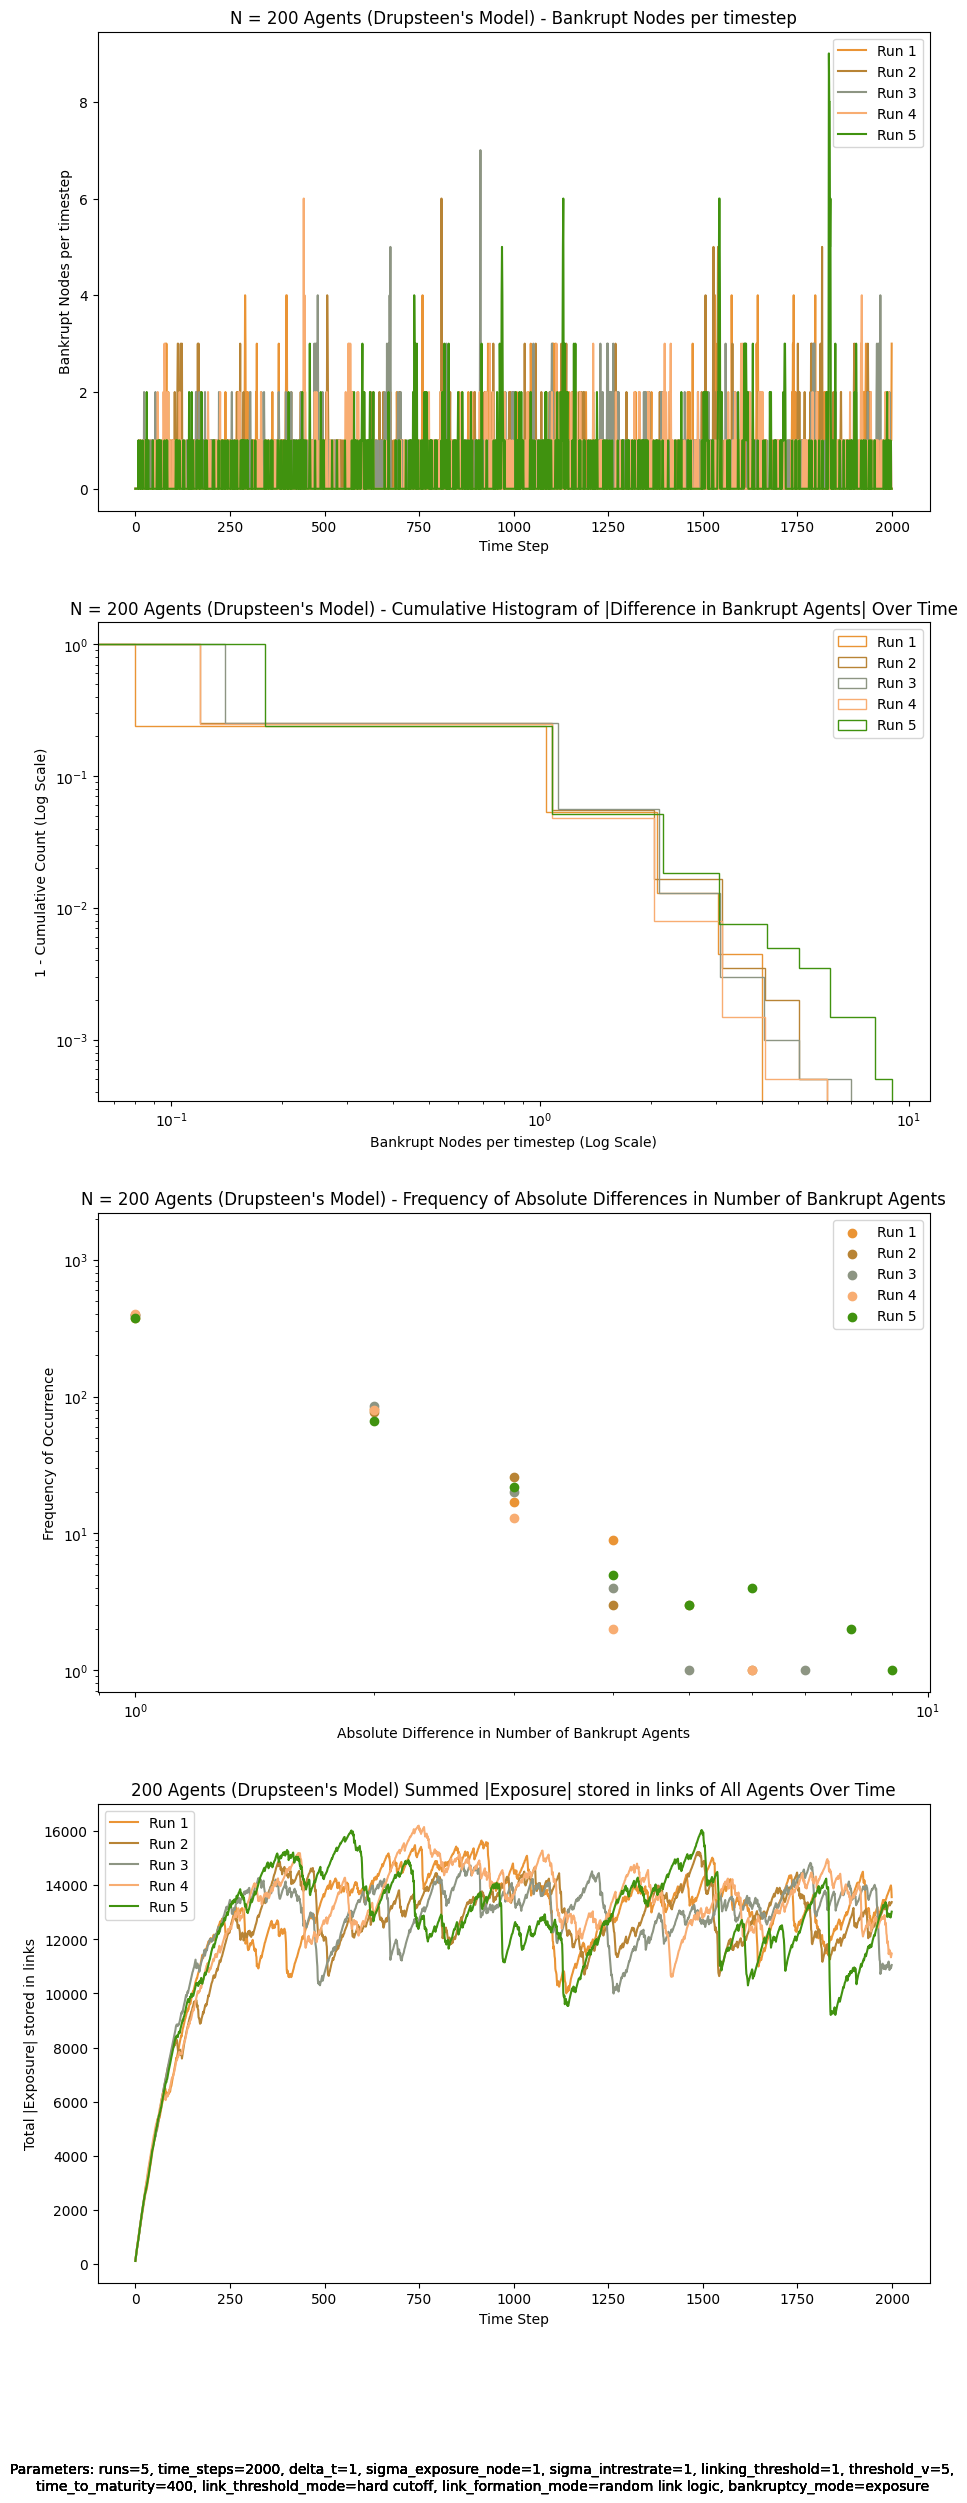

Results Summary for 300 Agents (Drupsteen's Model), run 1:
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 05, Feb, 2024
Time:                     00:33:09
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    6.88561
Nobs:                     1997.00    HQIC:                   6.86077
Log likelihood:          -12489.3    FPE:                    940.443
AIC:                      6.84635    Det(Omega_mle):         933.884
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.634653         0.148512            4.273           0.000
L1.y1         0.029372         0.069612            0.422           0.673
L1.y2        -0.001870         0.000

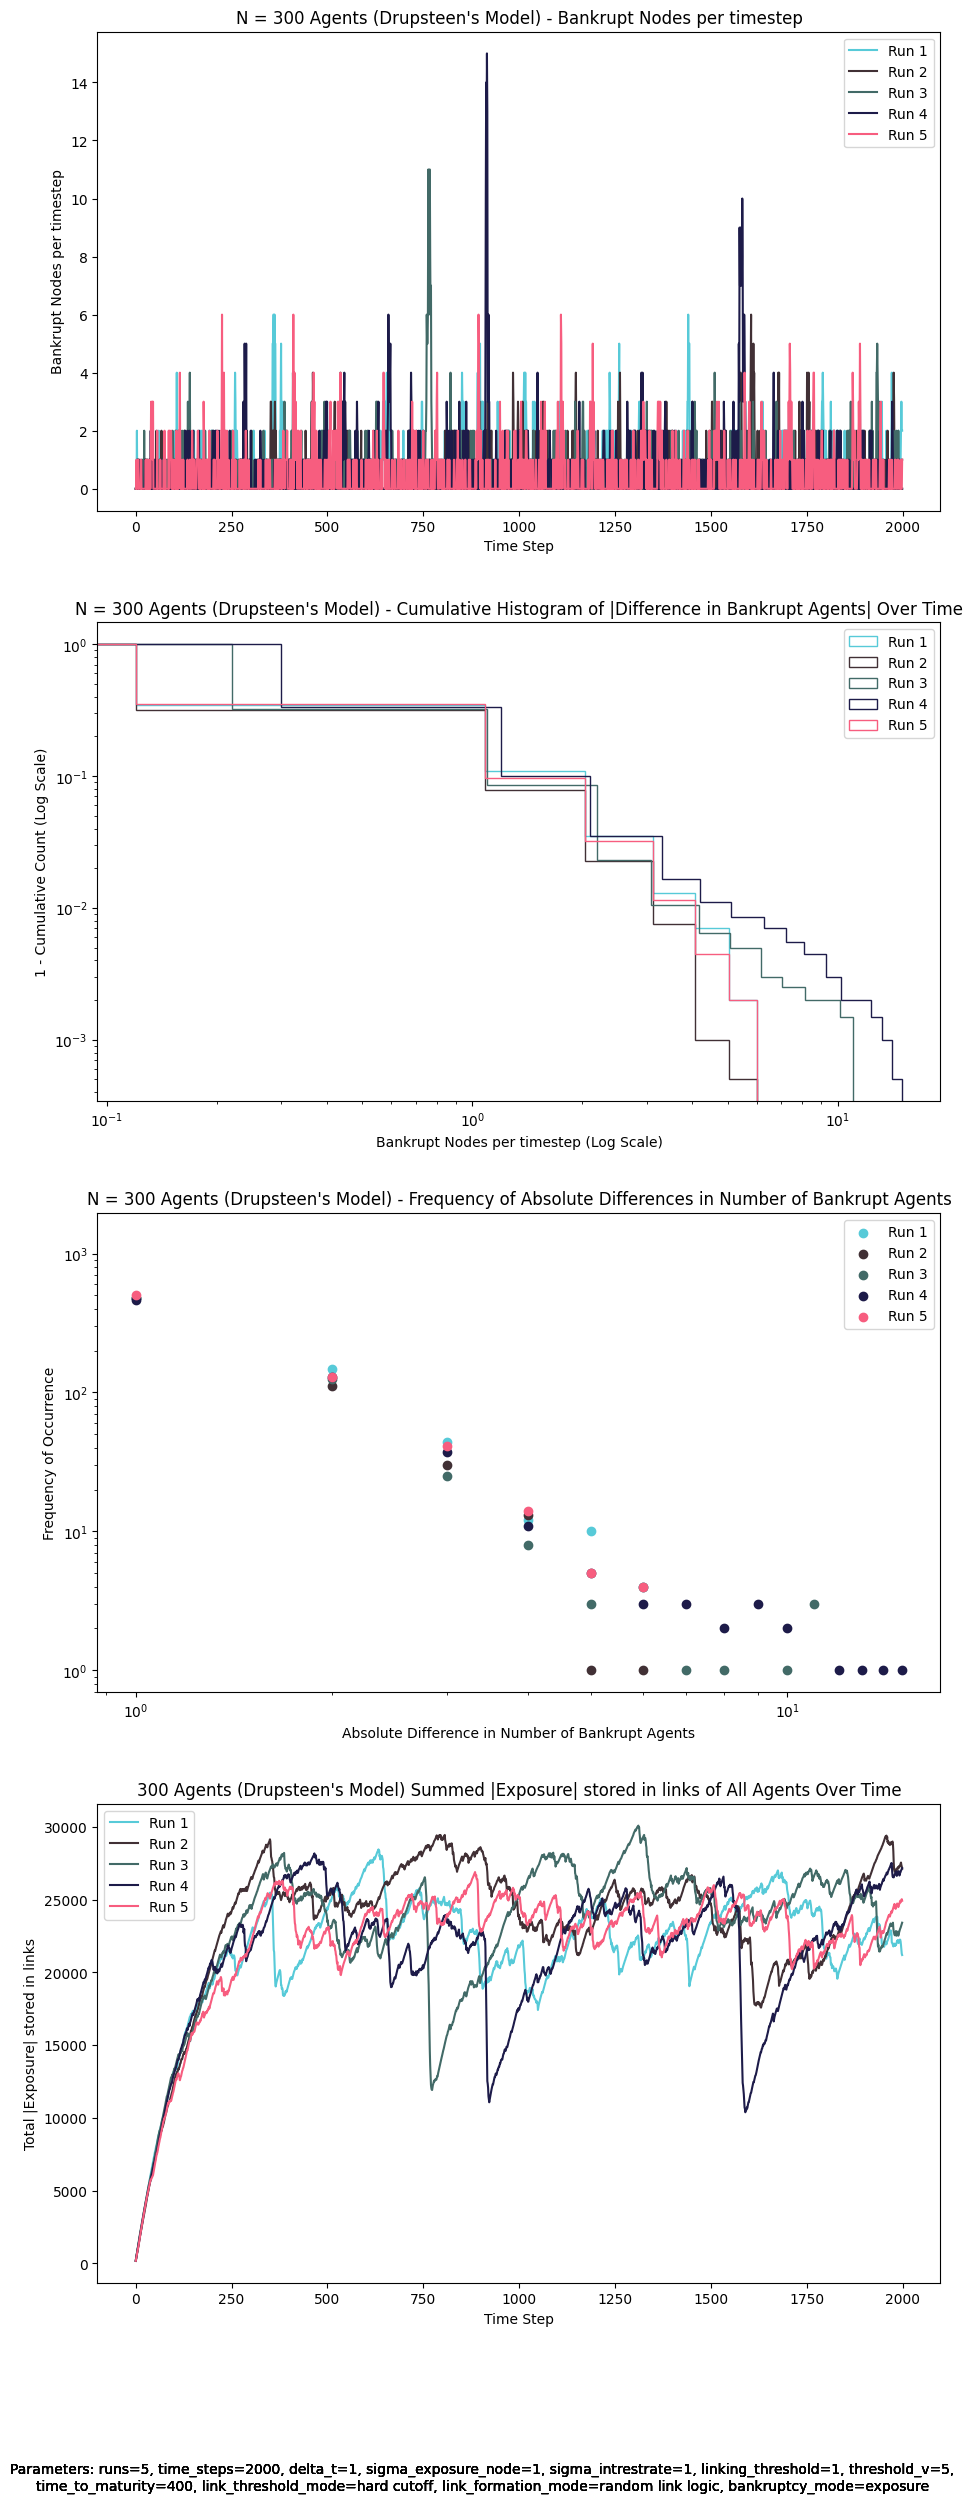

In [15]:
cm.plot_bankruptcy_analysis_multiple_arrays(selected_files, titles, param_caption)

In [16]:
data_Drupsteen

[1    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
 2    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
 3    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...
 4    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
 5    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
 Name: Abs Difference of Bankrupt Agents Over Time, dtype: object,
 1    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
 2    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
 3    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
 4    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
 5    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
 Name: Abs Difference of Bankrupt Agents Over Time, dtype: object,
 1    [0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
 2    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...
 3    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
 4    [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...
 5    [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...
 Name: Abs Difference of B

In [17]:
cm.fit_power_law_array(data_Drupsteen, titles)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data

,N agents (Nodes),run,alpha exponent,likelihood ratio,p-value
0,100 Agents (Drupsteen's Model),1,9.135399,13.067375,0.0***
1,100 Agents (Drupsteen's Model),2,10.928717,2.703785,0.0069**
2,100 Agents (Drupsteen's Model),3,12.691453,4.436069,0.0***
3,100 Agents (Drupsteen's Model),4,32.284535,3.826657,0.0001***
4,100 Agents (Drupsteen's Model),5,55.258676,15.012201,0.0***
5,,Stouffer’s p-value,,,0.0***
6,200 Agents (Drupsteen's Model),1,6.509864,14.617672,0.0***
7,200 Agents (Drupsteen's Model),2,11.684209,4.424535,0.0***
8,200 Agents (Drupsteen's Model),3,8.665191,1.506681,0.1319
9,200 Agents (Drupsteen's Model),4,13.377589,4.573385,0.0***


From the results we see that although powerlaw seems to explain each model better than an exponential going by Stouffers combined p-value, the exponents of our model are between 2 and 3 mostly, indicating a finite mean and infite variance, while the exponents of our implementation of Drupsteens model are between 2 and 55. This could be an artifact of burn in time necessary for the model of Drupsteen, an implementation mistake, or some other reason like different bankruptcy thresholds chosen that lead to this result.
Thus, we reject H0A which states that the distribution of bankruptcies follows an exponential better than a powerlaw at alpha = 0.05, based on the aggregate p values of stouffers for 5 runs and all tested system sizes (N=100, N=200, N=300) for both our model and Drupsteens model.
However, given the low number of runs and parameter space looked at, and also the spurrious looking alpha coefficients for Drupsteens model, interpret these results with caution.

For an aggregate overview of the results of the VAR timeseries analysis for temporation relationships between abs exposure stored in the links (in our model only), please view presentation slide 28. Only VAR test on our model are reported, based on the results stated on that slide we conclude that the VAR model shows positive short term relationships between bankruptcies per timestep and total abs energy stored in the links in 4/5 cases, with exposure stored in the links influencing defaults in 1 out of 5 runs. Usually the first lag is significant at the alpha = 0.05 level, with the expception of the last run where lag 1 and 2 are significant. A possible explaination of this result is that when a node dies, a new node spawns, which has 0 links at that time. This can cause many links to be formed to this node by the other nodes. Further research on this should be done however as this hypothesis was not tested in this project.

# Plot 2: Average default size vs. Varying system sized (comparing Drupsteen vs. our model)

In [18]:
param_caption = { "runs": 10,
  "time_steps": 2000,
  "delta_t": 1,
  "sigma_exposure_node": 1,
  "sigma_intrestrate": 1,
  "linking_threshold": 1,
  "threshold_v": 5,
  "linking_threshold": 1,
  "time_to_maturity": 400,
  "link_threshold_mode": "hard cutoff",
}

In [19]:
path_model = R'.\Data\H2A'

input_parameters_model = '2000_1_1_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate'
input_parameters_Drupsteen = '2000_1_1_1_5_1_3_400_hard cutoff_random link logic_exposure'

selected_files_model = cm.get_files_with_parameters(path_model, input_parameters_model)
selected_files_Drupsteen = cm.get_files_with_parameters(path_model, input_parameters_Drupsteen)

data_plot_2_our_model_diff_agents = cm.select_variable_given_list_of_dfs(selected_files_model, 'Abs Difference of Bankrupt Agents Over Time')
data_plot_2_Drupsteen_diff_agents = cm.select_variable_given_list_of_dfs(selected_files_Drupsteen, 'Abs Difference of Bankrupt Agents Over Time')
data_plot_2_our_model_num_agents = cm.select_variable_given_list_of_dfs(selected_files_model, 'Number of Bankrupt Agents Over Time')
data_plot_2_Drupsteen_num_agents = cm.select_variable_given_list_of_dfs(selected_files_Drupsteen, 'Number of Bankrupt Agents Over Time')

All files in directory: ['100_2000_1_1_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240201000132.csv', '100_2000_1_1_1_5_1_3_400_hard cutoff_random link logic_exposure_20240201023652.csv', '100_200_1_1_1_2_2_2_1_hard cutoff_divide exposure singly_exposure_20240131235744.csv', '200_2000_1_1_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240201001322.csv', '200_2000_1_1_1_5_1_3_400_hard cutoff_random link logic_exposure_20240201024300.csv', '300_2000_1_0.5_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240201042113.csv', '300_2000_1_1_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240201003939.csv', '300_2000_1_1_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240201045936.csv', '300_2000_1_1_1_5_1_3_400_hard cutoff_random link logic_exposure_20240201025542.csv', '300_2000_1_2_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240201053620.csv', '300_2000_1_3_1_5_1_3_400_hard cutoff_divide exposure sin

[1.4012, 2.41965, 3.34615, 3.2612, 4.2105500000000005]
500
Our Model
                            OLS Regression Results                            
Dep. Variable:              dependent   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     36.10
Date:                Mon, 05 Feb 2024   Prob (F-statistic):            0.00924
Time:                        00:33:12   Log-Likelihood:               -0.42402
No. Observations:                   5   AIC:                             4.848
Df Residuals:                       3   BIC:                             4.067
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\venv\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\venv\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


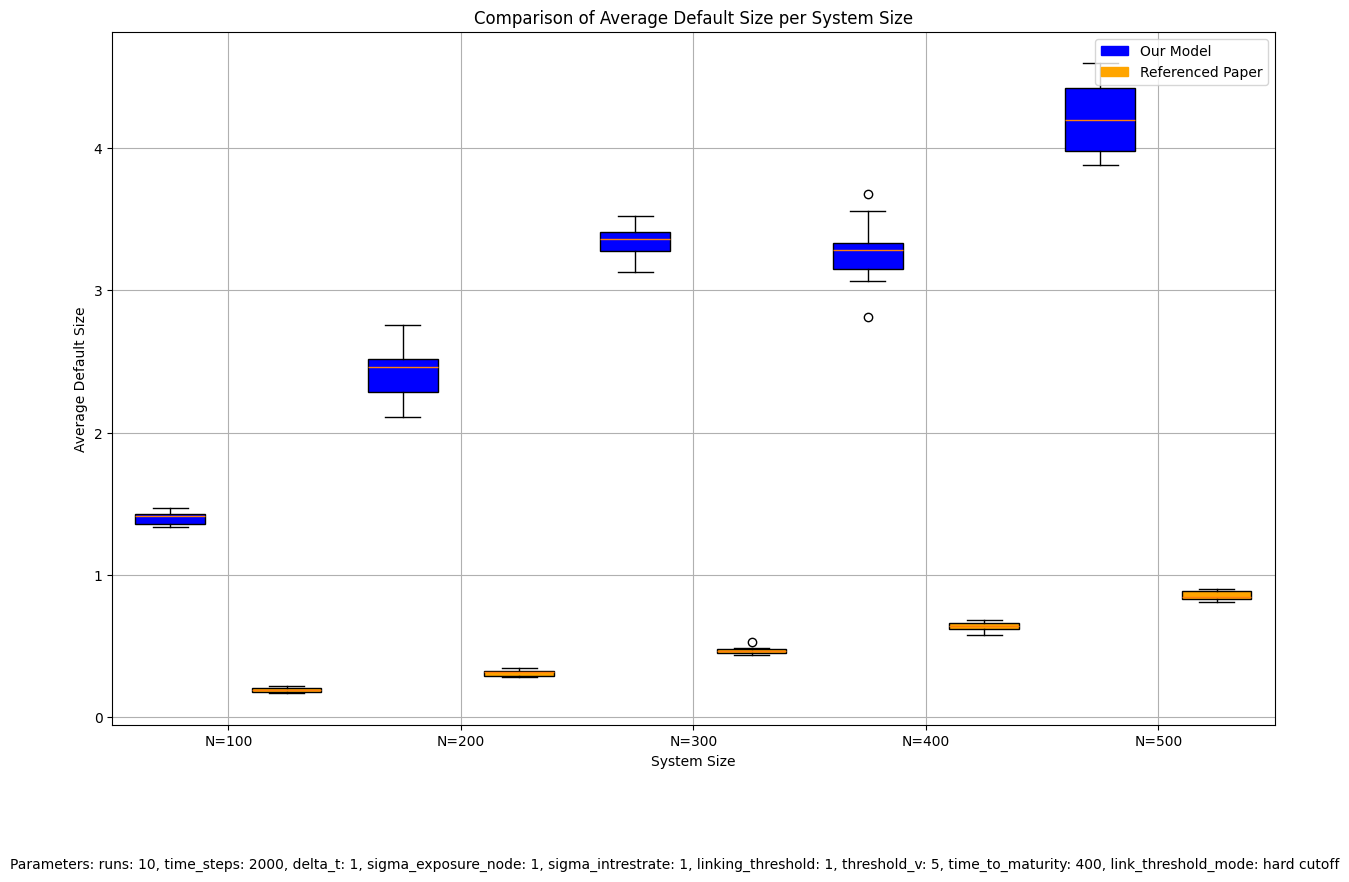

In [20]:
system_sizes = [100, 200, 300, 400, 500]
# set default threshold
default_consideration_threshold = 0
cm.plot_average_default_size(data_array_num_model=data_plot_2_our_model_num_agents, data_array_diff_model=data_plot_2_our_model_diff_agents, data_array_num_paper=data_plot_2_Drupsteen_num_agents, data_array_diff_paper=data_plot_2_Drupsteen_diff_agents, titles=titles, system_sizes=system_sizes, default_consideration_threshold=default_consideration_threshold, param_caption= param_caption)

Due to the low number of observations, normality cannot be tested and may be violated. In our model average default size is always higher, and shows a significant linear trend. H0b of average system size having a beta coefficient being 0 is thus rejected at alpha = 0.05 using this sample and significance. However, we should interpret this with caution as the sample size is low (n=5). rescaling average default size by dividing it by system size might cause the trend to go away, which would be interesting to look at for larget system sizes in future research. 

# Sensitivty Analysis Avalanche Probability vs. Sigma exposure node

In [21]:
directory_path = R'.\Data\Senstivity_analysis\exposure'
all_items = os.listdir(directory_path)

In [22]:
all_items

['300_2000_1_0.5_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240201090116.csv',
 '300_2000_1_0.5_1_5_1_3_400_hard cutoff_random link logic_exposure_20240201173955.csv',
 '300_2000_1_1_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240201094017.csv',
 '300_2000_1_1_1_5_1_3_400_hard cutoff_random link logic_exposure_20240201181730.csv',
 '300_2000_1_2_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240201111006.csv',
 '300_2000_1_2_1_5_1_3_400_hard cutoff_random link logic_exposure_20240201182116.csv',
 '300_2000_1_3_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240201114848.csv',
 '300_2000_1_3_1_5_1_3_400_hard cutoff_random link logic_exposure_20240201182309.csv',
 '300_2000_1_4_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240201122726.csv',
 '300_2000_1_4_1_5_1_3_400_hard cutoff_random link logic_exposure_20240201182431.csv',
 'old']

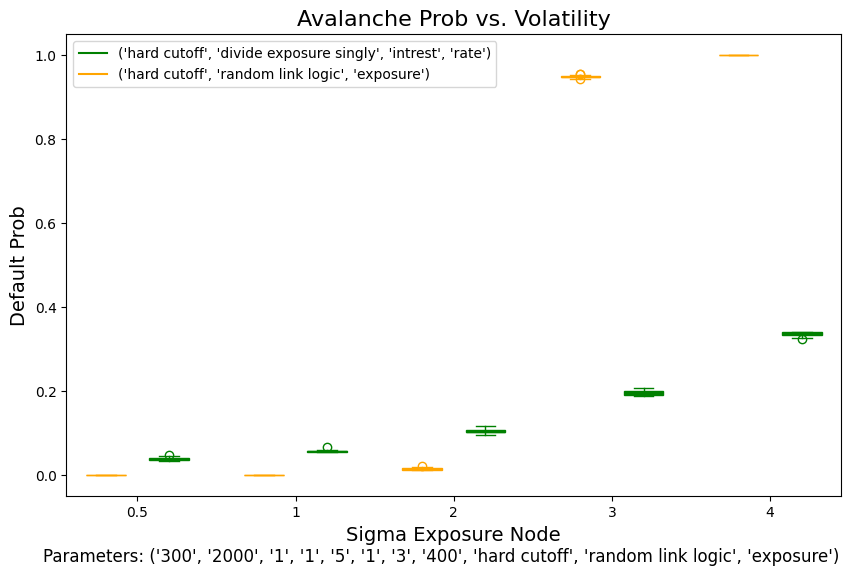

In [23]:
directory_path = R'.\Data\Senstivity_analysis\exposure'
cm.plot_avalanche_prob_vs_volatility_combined(directory = directory_path, threshold = 15, mode='sigma_exposure_node')

Here we see our model rising alow slower in default probability compared to Drupsteens model, where here we define default to be the bankruptcy of 15 nodes or more.
 The patern we see gives an indication of how sensitive the models are to the standard deviation of node exposure (sigma node exposure), with out model being alot less sensitive (meaning lower probability of default) then Drupsteens model, until the standard deviation of node exposure crosses 3. This is to be expected because our threshold for default is set at 5 here, causing nodes with standard deviation of 3 of higher to exceed that value very often, while in our model the bankrupty is determined by the expsure times the interest rate price change exceeding a threshold.  As the standard deviation of the intrest rate time series our model is exposed to is still 1, this results our model in our model being more senstive to default even at low node exposure sigma, and less sensitive at high sigma. Therefor we conclude that individual variation in node exposure is relatively less consequential in our model than in drupsteens, given this sample of 15 runs and these settings.

# H3A: 

In [24]:
directory_path = R'.\Data\H3A\intrest'
all_items = os.listdir(directory_path)

In [25]:
all_items

['300_2000_1_1_0.5_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240201132725.csv',
 '300_2000_1_1_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240201141039.csv',
 '300_2000_1_1_2_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240201145238.csv',
 '300_2000_1_1_3_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240201153229.csv',
 '300_2000_1_1_4_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240201161125.csv']

Key: ('300', '2000', '1', '1', '5', '1', '3', '400', 'hard cutoff', 'divide exposure singly', 'intrest', 'rate')
                            OLS Regression Results                            
Dep. Variable:              dependent   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     264.5
Date:                Mon, 05 Feb 2024   Prob (F-statistic):             0.0452
Time:                        00:33:14   Log-Likelihood:                 16.838
No. Observations:                   5   AIC:                            -25.68
Df Residuals:                       1   BIC:                            -27.24
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\venv\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


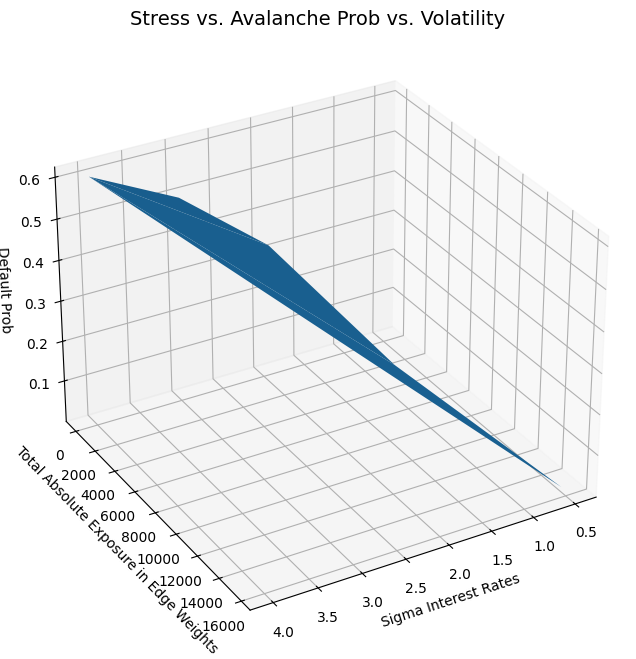

In [26]:
cm.stress_vs_avalanche_prob_vs_volatility(directory=directory_path, mode = 'sigma_interest_rates')

From the plot (for a better viewing angle please see presentation slide 23) we can see that a higher number of energy in the links is associated with a lower probability of default for the given default size (15 nodes bankrupt is default here) and parameter settings, although hypothesis test for the interaction effect are insignificant, meaninh H3A is rejected given this sample and significance. However, the VAR analysis does done in the beginning of the notebook provide evidence for a significant temportal relationship between these quantities that this cross sectional test did not find.

# Sensitivty analyisis Median number of bankrupt agents vs. Bankruptcy threshold

In [27]:
def perform_pairwise_comparisons(data_to_plot1, data_to_plot2, thresholds):
    """
    Performs pairwise comparisons between two datasets across specified thresholds.
    
    This function iterates over two lists of data, `data_to_plot1` and `data_to_plot2`, comparing their group means at each index up to the minimum length of the two lists. For each comparison, it prints the result alongside the corresponding threshold from the `thresholds` list.
    
    Parameters:
    - data_to_plot1 (list): A list of datasets (e.g., lists, arrays) to compare. Each element represents a different group or condition.
    - data_to_plot2 (list): Another list of datasets to compare against `data_to_plot1`. Each element corresponds to the one in `data_to_plot1` by index.
    - thresholds (list): A list of thresholds or criteria corresponding to each comparison. Used for labeling output.
    
    Returns:
    - None. Results of comparisons are printed directly.
    """
    
    # Iterate over the datasets up to the length of the shortest list
    for i in range(min(len(data_to_plot1), len(data_to_plot2))):
        # Compare group means for the current pair of datasets
        result = cm.compare_group_means(data_to_plot1[i], data_to_plot2[i])
        # Print the comparison result alongside the current threshold
        print(f"Comparison for Threshold {thresholds[i]}: \n {result}\n")

In [28]:
all_items

['300_2000_1_1_0.5_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240201132725.csv',
 '300_2000_1_1_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240201141039.csv',
 '300_2000_1_1_2_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240201145238.csv',
 '300_2000_1_1_3_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240201153229.csv',
 '300_2000_1_1_4_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240201161125.csv']

{10.0: [0        NaN
1     0.6785
2     0.6990
3     0.7300
4     0.7530
5     0.7385
6     0.7350
7     0.6670
8     0.6880
9     0.6360
10    0.6760
11    0.6980
12    0.7580
13    0.6375
14    0.6965
15    0.6825
Name: Abs Difference of Bankrupt Agents Over Time, dtype: float64], 15.0: [0        NaN
1     0.3755
2     0.3775
3     0.3535
4     0.3700
5     0.3985
6     0.3760
7     0.3650
8     0.3540
9     0.3925
10    0.3945
11    0.3995
12    0.3525
13    0.3795
14    0.3635
15    0.3595
Name: Abs Difference of Bankrupt Agents Over Time, dtype: float64], 5.0: [0        NaN
1     3.3610
2     3.1375
3     3.4005
4     3.4215
5     3.3705
6     3.3255
7     3.3175
8     3.2555
9     3.2475
10    3.4360
11    3.0985
12    3.1020
13    3.4960
14    3.1795
15    3.4495
Name: Abs Difference of Bankrupt Agents Over Time, dtype: float64], 7.5: [0        NaN
1     1.0800
2     1.0665
3     1.0790
4     1.1590
5     0.9880
6     1.1150
7     1.0980
8     1.0515
9     1.0650
10    1.1135
11

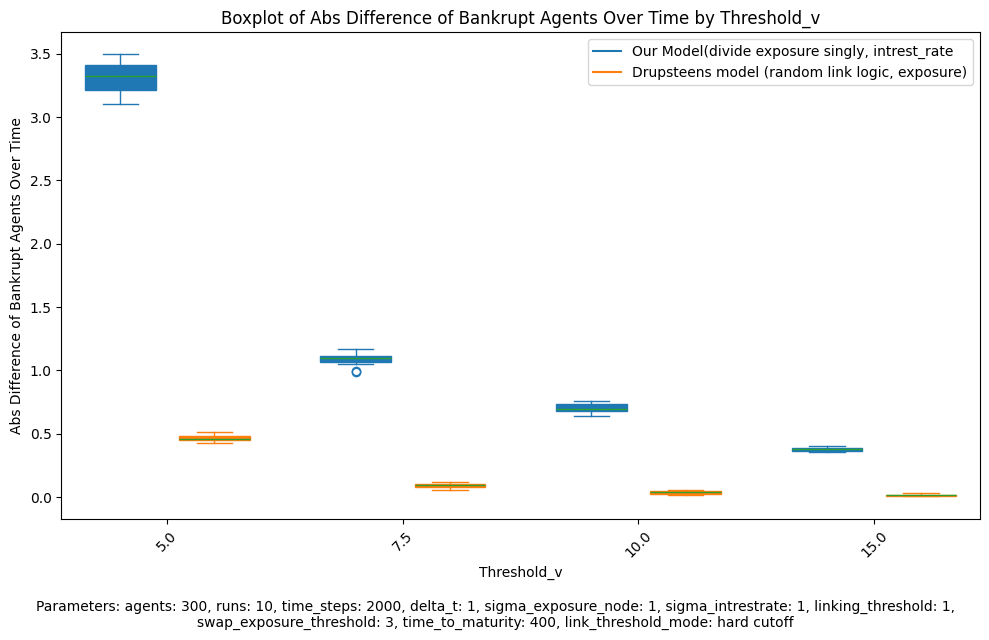

The data is not normal and/or not homogeneous, performing non-parametric Kruskal-Wallis test.
Comparison for Threshold 5.0: 
 Kruskal-Wallis Test Result:
H-statistic: 21.774193548387103
P-value: 3.0669777654622633e-06
Conclusion: There is a significant difference between the groups.

The data is not normal and/or not homogeneous, performing non-parametric Kruskal-Wallis test.
Comparison for Threshold 7.5: 
 Kruskal-Wallis Test Result:
H-statistic: 21.774193548387103
P-value: 3.0669777654622633e-06
Conclusion: There is a significant difference between the groups.

The data is not normal and/or not homogeneous, performing non-parametric Kruskal-Wallis test.
Comparison for Threshold 10.0: 
 Kruskal-Wallis Test Result:
H-statistic: 21.788735529830817
P-value: 3.043819488945355e-06
Conclusion: There is a significant difference between the groups.

The data is not normal and/or not homogeneous, performing non-parametric Kruskal-Wallis test.
Comparison for Threshold 15.0: 
 Kruskal-Wallis Tes

In [29]:
# First dataset，our model
pattern1 = R'.\Data\Senstivity_analysis\varying_threshold_both_models\300_2000_1_1_1_*_1_3_400_hard cutoff_divide exposure singly_intrest_rate_*.csv'
all_results1 = cm.get_statistics_vary_threshold_v(pattern=pattern1)
data1 = all_results1
print(data1)
thresholds1 = list(data1.keys())
data_to_plot1 = []
for values in data1.values():
    flattened_values = [x for sublist in values for x in sublist if not np.isnan(x)]
    data_to_plot1.append(np.array(flattened_values))
sorted_data1 = sorted(zip(thresholds1, data_to_plot1), key=lambda x: x[0])
thresholds1, data_to_plot1 = zip(*sorted_data1)

# Second dataset, Drupsteen model
pattern2 = R'.\Data\Senstivity_analysis\varying_threshold_both_models\300_2000_1_1_1_*_1_3_400_hard cutoff_random link logic_exposure_*.csv'
all_results2 = cm.get_statistics_vary_threshold_v(pattern=pattern2)
data2 = all_results2
thresholds2 = list(data2.keys())
data_to_plot2 = []
for values in data2.values():
    flattened_values = [x for sublist in values for x in sublist if not np.isnan(x)]
    data_to_plot2.append(np.array(flattened_values))
# Sorting the data by threshold values in ascending order
sorted_data2 = sorted(zip(thresholds2, data_to_plot2), key=lambda x: x[0])
thresholds2, data_to_plot2 = zip(*sorted_data2)

# Creating the boxplot
plt.figure(figsize=(10, 6))

# Plotting the boxplot for the first dataset
bp1 = plt.boxplot(data_to_plot1, positions=np.array(range(len(data_to_plot1)))*2.0-0.4, widths=0.6, patch_artist=True, boxprops=dict(facecolor='C0', color='C0'), whiskerprops=dict(color='C0'), capprops=dict(color='C0'), medianprops=dict(color='C2'), flierprops=dict(markeredgecolor='C0'))

# Plotting the boxplot for the second dataset
bp2 = plt.boxplot(data_to_plot2, positions=np.array(range(len(data_to_plot2)))*2.0+0.4, widths=0.6, patch_artist=True, boxprops=dict(facecolor='C1', color='C1'), whiskerprops=dict(color='C1'), capprops=dict(color='C1'), medianprops=dict(color='C2'), flierprops=dict(markeredgecolor='C1'))

# Adding dummy lines for the legend
plt.plot([], c='C0', label='Our Model(divide exposure singly, intrest_rate')
plt.plot([], c='C1', label='Drupsteens model (random link logic, exposure)')

# Setting the axis labels and title
plt.xlabel('Threshold_v')
plt.ylabel('Abs Difference of Bankrupt Agents Over Time')
plt.title('Boxplot of Abs Difference of Bankrupt Agents Over Time by Threshold_v')

# Setting the tick labels on the x-axis
plt.xticks(np.arange(0, len(thresholds1) * 2, 2), thresholds1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

param_caption = { "agents": 300,
  "runs": 10,
  "time_steps": 2000,
  "delta_t": 1,
  "sigma_exposure_node": 1,
  "sigma_intrestrate": 1,
  "linking_threshold": 1,
  "swap_exposure_threshold": 3,
  "linking_threshold": 1,
  "time_to_maturity": 400,
  "link_threshold_mode": "hard cutoff",
}

# Convert the dictionary into a string without curly braces and double quotes
param_caption_str = ', '.join(f"{key}: {value}" for key, value in param_caption.items())

plt.legend()
plt.figtext(0.5, -0.05, f"Parameters: {param_caption_str}", wrap=True, horizontalalignment='center', fontsize=10)

plt.show()
# Call the compare_group_means function with your datasets
cm.perform_pairwise_comparisons(data_to_plot1, data_to_plot2, thresholds1)

From the plots we can see that the median average bankrupt agennts (nodes) over time is systematicalyl higher in our model vs. Drupsteens model, given these 10  runs and these parameters. This can be explained by the fact that whenever the price change > 1, because the volatility in our model is defined as exposure times pricechange, vs. Drupsteens model where it is just exposure, the threshold will be reached sooner in our model. This is wat we also see and thus has an effect on median abosulute bankrupt agents per timestep. From the plots we see as expected, the differences are significant, however we can already see this from the plot only and normality assumptions are violated so a non parametric Kuskal Wallis test was chosen instead of an ANOVA.